## Standard shape descriptors

Shape descriptors are quantitative measures that characterise the geometric properties of objects. In biological image analysis, these descriptors are widely used to describe the morphology of cells, tissues, or anatomical structures. This tutorial introduces how to compute some standard shape descriptors using MuSpAn.

The four shape descriptors covered in this tutorial are:

1. Area: The total number of pixels (or physical units) contained within a shape.

2. Perimeter: The length of the boundary enclosing the shape.

3. Convexity: A measure of how closely a shape resembles its convex hull, computed as the ratio of the perimeter of the convex hull to the actual perimeter.

4. Circularity: A measure of how close a shape is to a perfect circle, defined as $\frac{4 \pi \text{Area}}{\text{Perimeter}^{2}}$.

These descriptors can be particularly useful in biological contexts. For example, in cell morphology, circularity and convexity can help distinguish between healthy and abnormal cells, as cancerous cells often exhibit irregular or spiky shapes. Similarly, in anatomical feature analysis, these measures can be used to quantify variations in tissue structure, identify structural anomalies, or compare morphological differences between samples.

Let's get started by loading a dataset with a lot of shapes!

MuSpAn domain loaded successfully. Domain summary:
Domain name: Xenium-Healthy-Colon
Number of objects: 74174
Collections: ['Cell boundaries', 'Nucleus boundaries', 'Transcripts']
Labels: ['Cell ID', 'Transcript Counts', 'Cell Area', 'Cluster ID', 'Nucleus Area', 'Transcript', 'Transcript ID'] 
Networks: [] 
Distance matrices: []


(<Figure size 1500x1200 with 2 Axes>, <Axes: >)

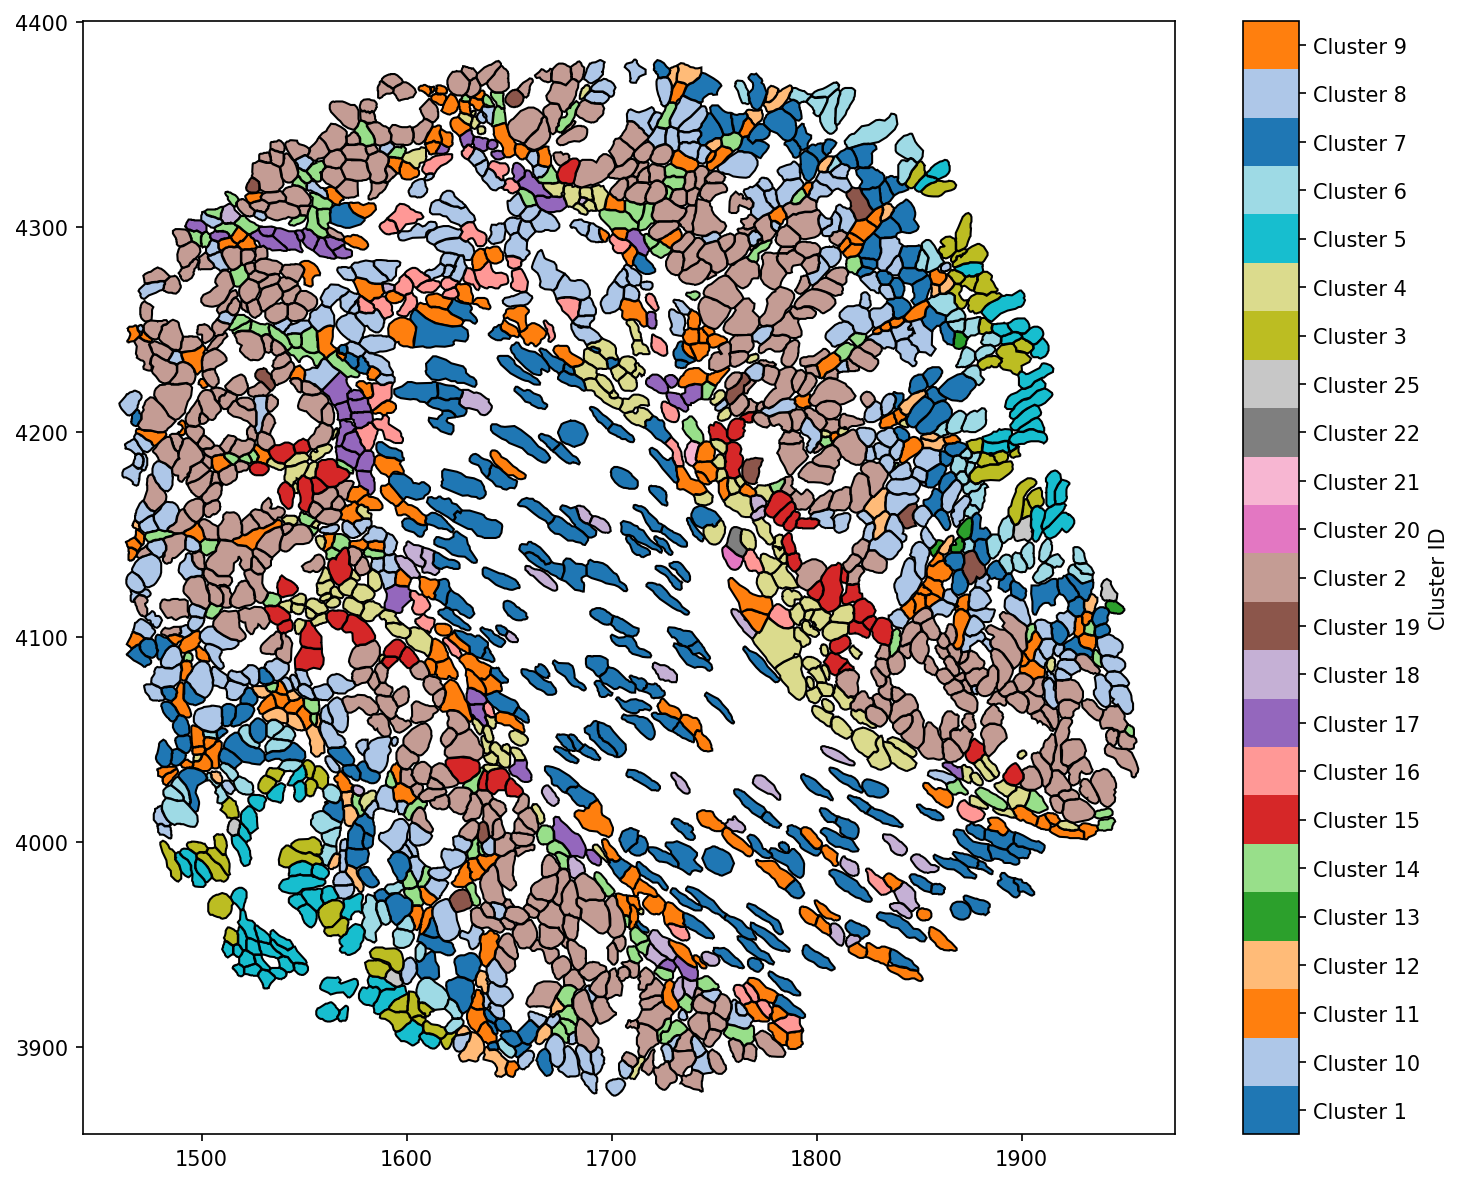

In [1]:
# Import the muspan and plt libraries
import muspan as ms
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

# Load the example domain data for 'Xenium-Healthy-Colon'
domain = ms.datasets.load_example_domain('Xenium-Healthy-Colon')

# Visualise the domain, colouring by 'Cluster ID' and plotting the cell boundaries
ms.visualise.visualise(domain, color_by='Cluster ID', objects_to_plot=('collection', 'Cell boundaries'), shape_kwargs=dict(alpha=1))

All the metrics (1-4) covered in this tutorial can be found in the `geometry` submodule. Each of these output the areas and the associated object identifiers. In addition, these functions able use to add these geometric metrics directly as a label for the objects it is computed on. This can be activated by setting `add_as_label=True`.

We'll check these features out by first computing the area of each of these cell boundaries using the `area` function. 

              Cell ID  Transcript Counts   Cell Area Cluster ID  Nucleus Area  \
object_id                                                                       
0.0        nhdfilal-1              230.0   43.304845  Cluster 7           NaN   
1.0        dkhbniei-1              197.0   40.053595  Cluster 8           NaN   
2.0        dkjajkjl-1              279.0   53.284377  Cluster 6           NaN   
3.0        ndijeadf-1              299.0   54.277814  Cluster 6           NaN   
4.0        dkjabafb-1              581.0  106.568754  Cluster 5           NaN   
...               ...                ...         ...        ...           ...   
74169.0    dfcbmddg-1                NaN         NaN        NaN           NaN   
74170.0    dfcbmddg-1                NaN         NaN        NaN           NaN   
74171.0    dfcbmddg-1                NaN         NaN        NaN           NaN   
74172.0    dfcbmddg-1                NaN         NaN        NaN           NaN   
74173.0    dfcbmddg-1       

(<Figure size 1500x1200 with 2 Axes>, <Axes: >)

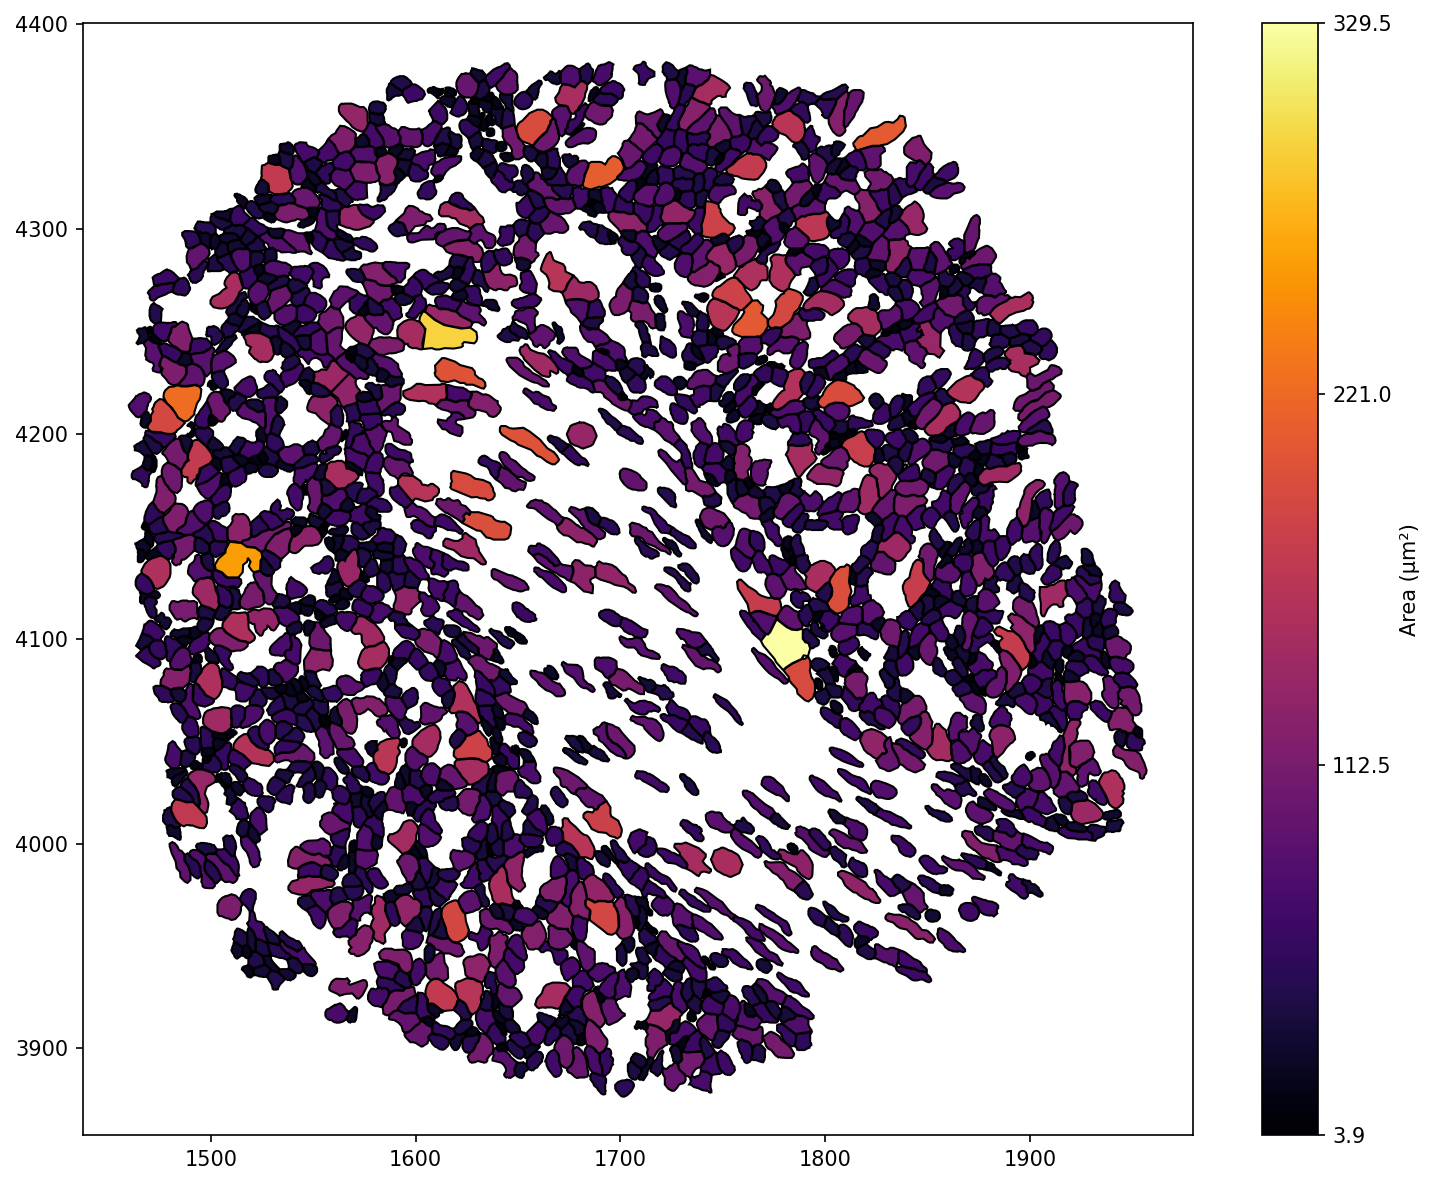

In [2]:
# Calculate the area of cell boundaries in the domain
# Add the calculated area as a label to the domain with the name 'Area (µm²)'
# Use the 'inferno' colormap for visualisation
area, object_ids = ms.geometry.area(domain, population=('collection','Cell boundaries'), add_as_label=True, label_name='Area (µm²)', cmap='inferno')

# Print the calculated area labels
domain.print_labels()

# Visualise the domain, colouring by the calculated area and plotting the cell boundaries
ms.visualise.visualise(domain, color_by='Area (µm²)', objects_to_plot=('collection','Cell boundaries'), shape_kwargs=dict(alpha=1))


We can see that the area ('Area (µm²)') have been added as a continuous labels to the domain, but only to those we computed the metric for - Cell boundaries. 

In general, we can see the more epithelial-like cells have a larger area compared to the stromal-like cells in the centre of the domain.

The approach is very similar if we wanted to compute the perimeter for these objects. For this we need the `perimeter` function in `geometry`.

(<Figure size 1500x1200 with 2 Axes>, <Axes: >)

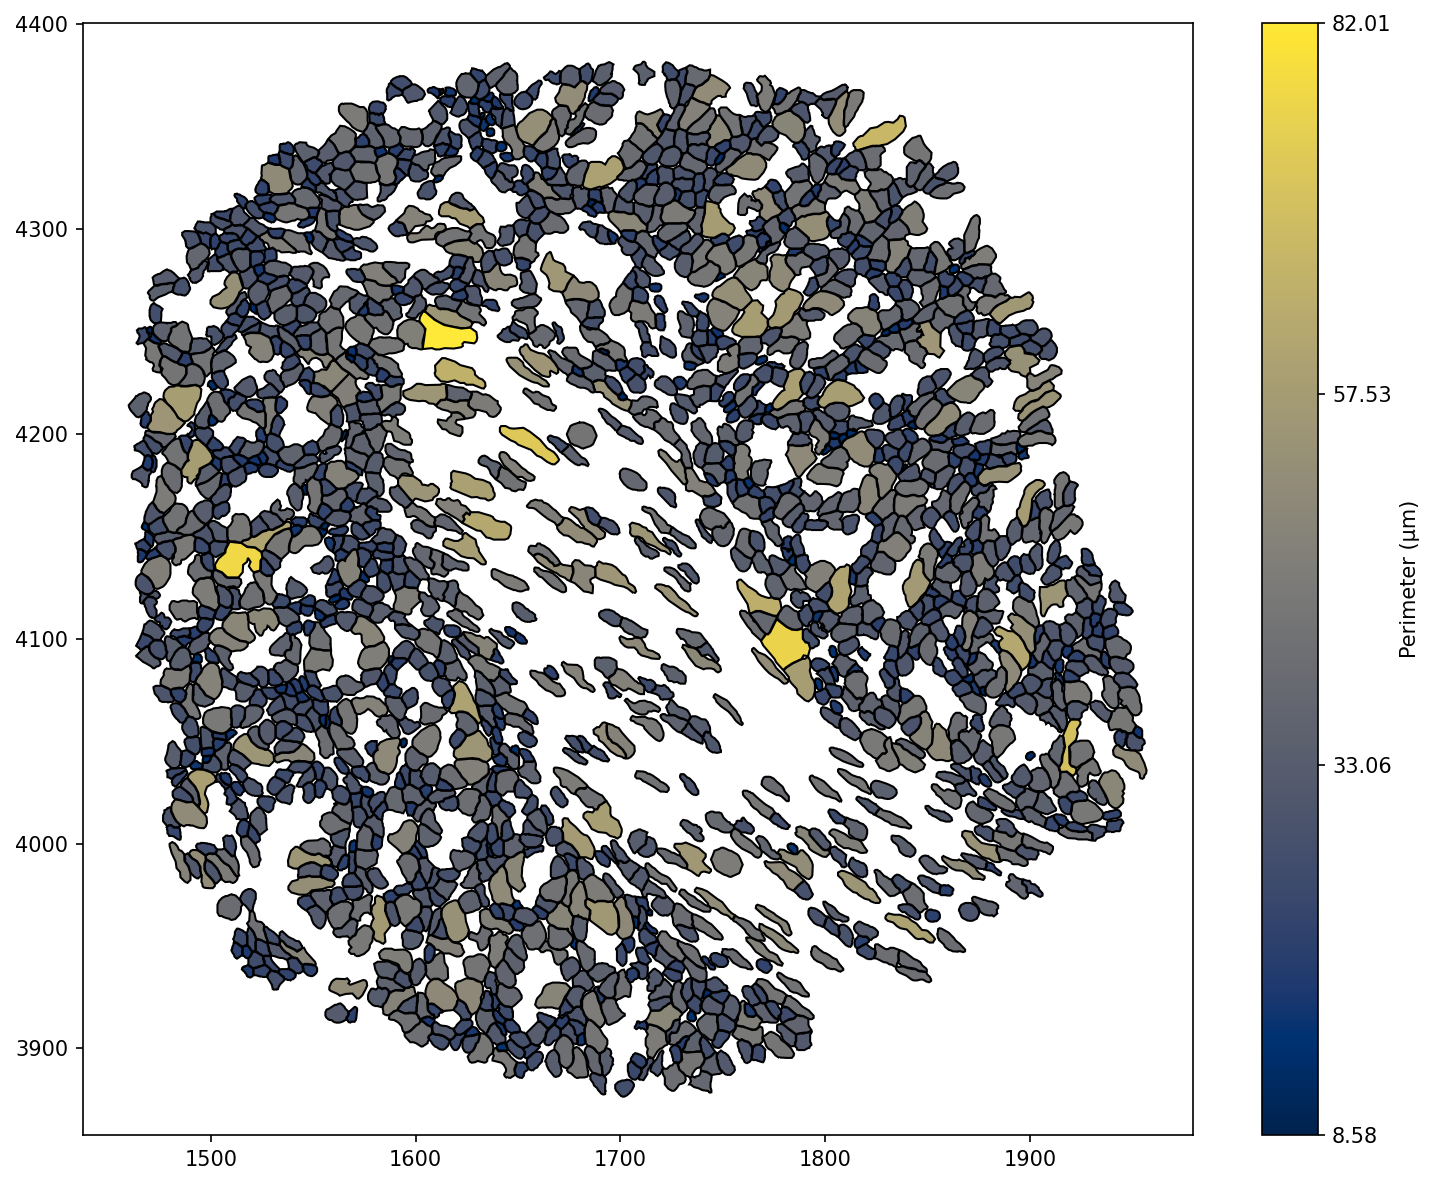

In [3]:
# Calculate the perimeter of cell boundaries in the domain
# Add the calculated perimeter as a label to the domain with the name 'Perimeter (µm)'
# Use the 'cividis' colormap for visualisation
perimeter, object_ids = ms.geometry.perimeter(domain, population=('collection','Cell boundaries'), add_as_label=True, label_name='Perimeter (µm)', cmap='cividis')

# Visualise the domain, colouring by the calculated perimeter and plotting the cell boundaries
ms.visualise.visualise(domain, color_by='Perimeter (µm)', objects_to_plot=('collection','Cell boundaries'), shape_kwargs=dict(alpha=1))


It's not surprising to see that the cells that have the larger areas also have larger perimeters - however there are some smaller cells that have large perimeters, indicating the presence of more complex shapes in our domain. Probing this deeper, we can measure the convexity of the objects, as this will isolate those cells with a much larger perimeter than area. We can compute the convexity by employing the `convexity` function in `geometry`.

(<Figure size 1500x1200 with 2 Axes>, <Axes: >)

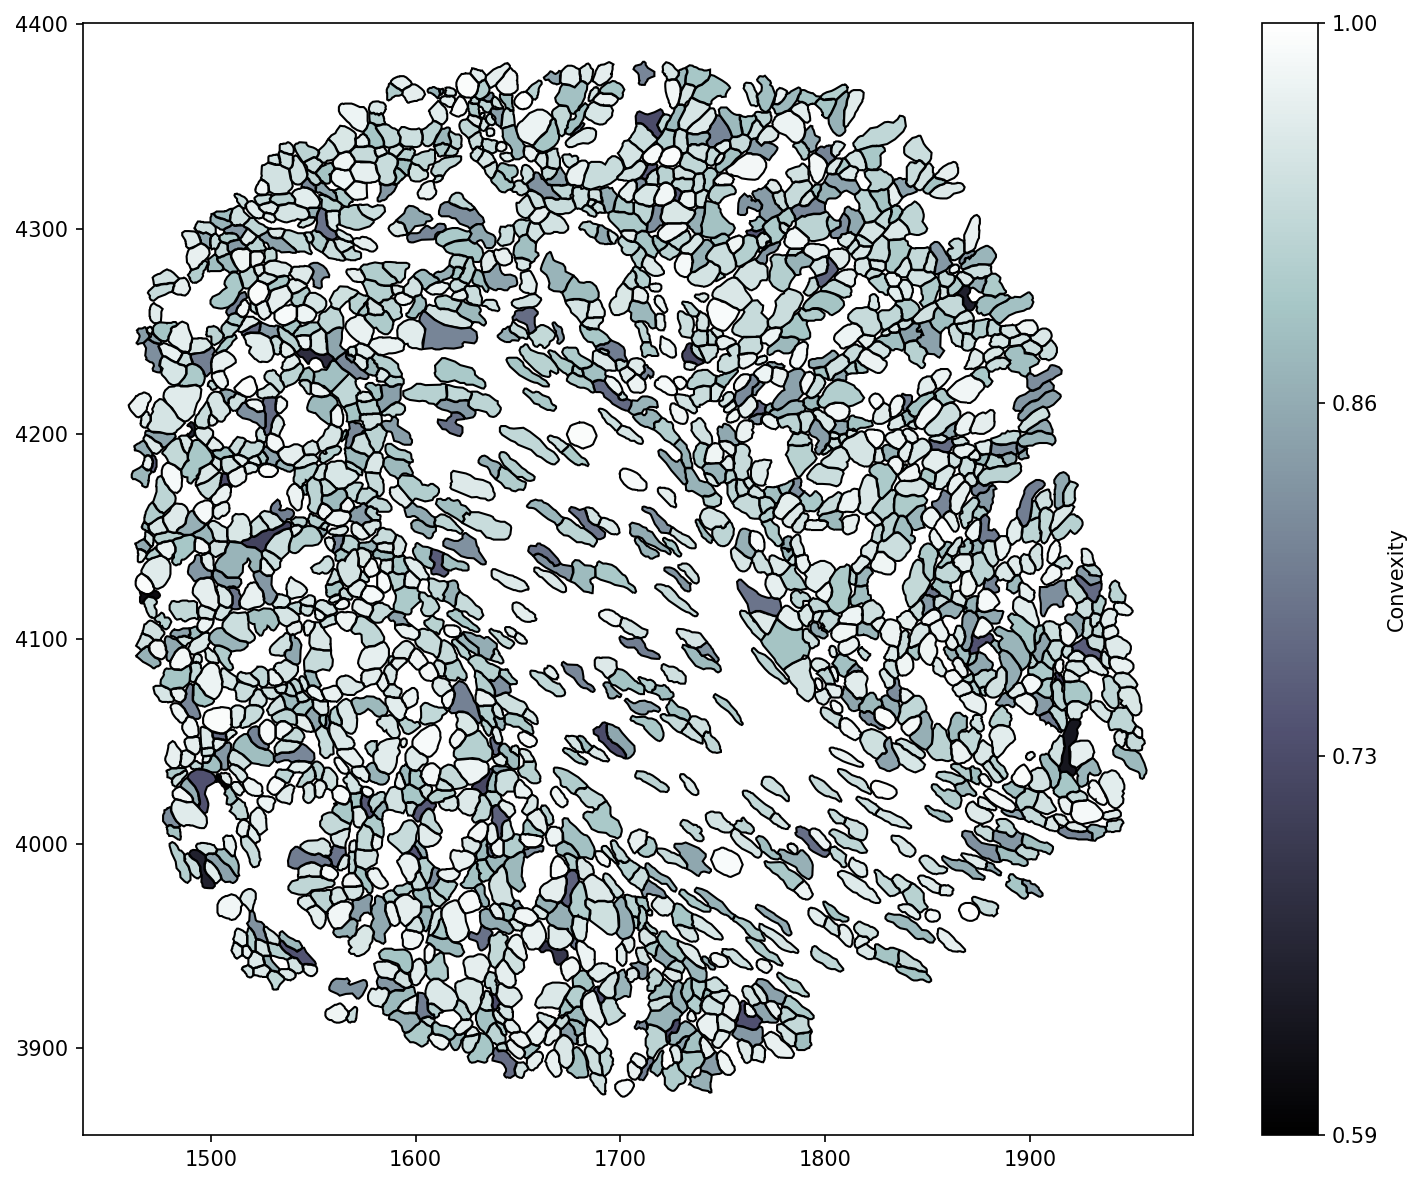

In [4]:
# Calculate the convexity of cell boundaries in the domain
# Add the calculated convexity as a label to the domain with the name 'Convexity'
# Use the 'bone' colormap for visualisation
convexity, object_ids = ms.geometry.convexity(domain, population=('collection','Cell boundaries'), add_as_label=True, label_name='Convexity', cmap='bone')

# Visualise the domain, colouring by the calculated convexity and plotting the cell boundaries
ms.visualise.visualise(domain, color_by='Convexity', objects_to_plot=('collection','Cell boundaries'), shape_kwargs=dict(alpha=1))

An alternative metric to identify the irregularity of a shape is the circularity index. This measures how similar the shape is to a circle of the same area.

We've been seeing some differences between the inner-most cells (Cluster 1) and cells in the outer-regions (Cluster 2), particularly as these are stromal and epithelial cells (not surprising!). We can isolate these populations using our `query` infrustructure in MuSpAn to directly compare their circularity.

(<Figure size 1200x1050 with 5 Axes>, <Axes: >)

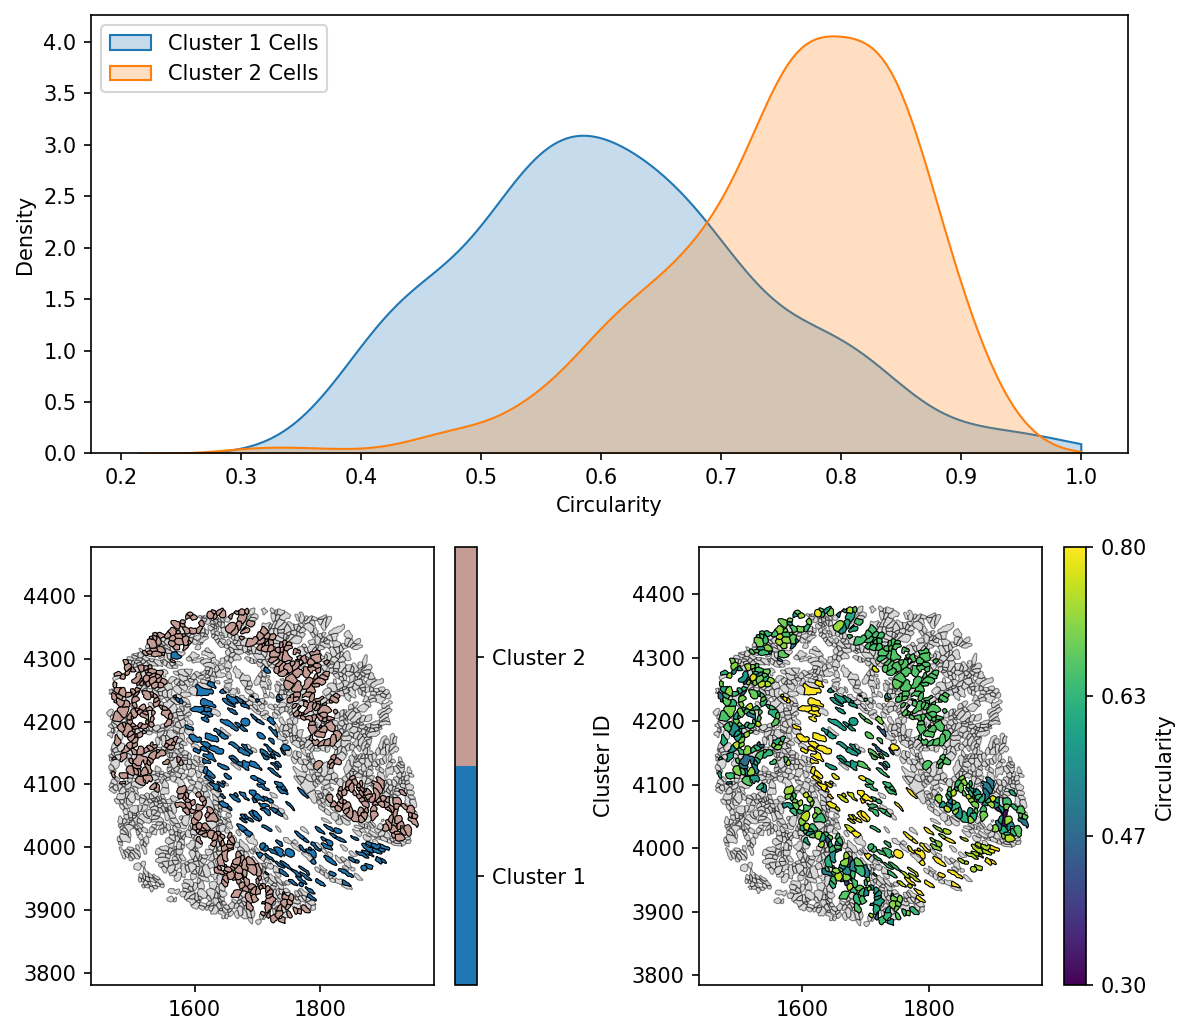

In [5]:
# We'll import seaborn to create a KDE plot
import seaborn as sns

# Query the cell boundaries for Cluster 1 and Cluster 2
cell_1 = ms.query.query_container(('collection', 'Cell boundaries'), 'AND', ('Cluster ID', 'Cluster 1'), domain)
cell_2 = ms.query.query_container(('collection', 'Cell boundaries'), 'AND', ('Cluster ID', 'Cluster 2'), domain)

# this query is just for visualisation purposes - we want both Cluster 1 and Cluster 2 cells
cell_1_and_2=ms.query.query_container(('collection', 'Cell boundaries'), 'AND', ms.query.query(domain,('label','Cluster ID'),'in',['Cluster 1','Cluster 2']),domain)


# Calculate the circularity for Cluster 1 and Cluster 2 cells
circularity_1, _ = ms.geometry.circularity(domain, population=cell_1, add_as_label=True, label_name='Circularity', cmap='viridis')
circularity_2, _ = ms.geometry.circularity(domain, population=cell_2, add_as_label=True, label_name='Circularity', cmap='viridis')

# Create a figure with two subplots
fig=plt.figure(figsize=(8, 7))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Plot KDE of circularity for Cluster 1 and Cluster 2 cells on ax1 - a smoothed histogram
sns.kdeplot(circularity_1, ax=ax1, label='Cluster 1 Cells', shade=True,clip=(0,1))
sns.kdeplot(circularity_2, ax=ax1, label='Cluster 2 Cells', shade=True,clip=(0,1))
ax1.set_xlabel('Circularity')
ax1.set_ylabel('Density')
ax1.legend()


# Visualise the domain with cell boundaries and circularity for Cluster 1 and Cluster 2 cells
ms.visualise.visualise(domain, color_by=('constant', [0.7, 0.7, 0.7, 1]), objects_to_plot=('collection', 'Cell boundaries'), shape_kwargs=dict(alpha=0.5,linewidth=0.5), ax=ax3)
ms.visualise.visualise(domain, color_by='Circularity', objects_to_plot=cell_1, shape_kwargs=dict(alpha=1,linewidth=0.5), ax=ax3, vmin=0.3, vmax=0.8)
ms.visualise.visualise(domain, color_by='Circularity', objects_to_plot=cell_2, shape_kwargs=dict(alpha=1,linewidth=0.5), ax=ax3, add_cbar=False)

# Visualise the domain with cell boundaries and Cluster ID for Cluster 1 and Cluster 2 cells
ms.visualise.visualise(domain, color_by=('constant', [0.7, 0.7, 0.7, 1]), objects_to_plot=('collection', 'Cell boundaries'), shape_kwargs=dict(alpha=0.5,linewidth=0.5), ax=ax2)
ms.visualise.visualise(domain, color_by='Cluster ID', objects_to_plot=cell_1_and_2, shape_kwargs=dict(alpha=1,linewidth=0.5), ax=ax2, vmin=0.3, vmax=0.8)


In this tutorial, we explored how to compute standard shape descriptors—area, perimeter, convexity, and circularity—using Muspan. 

Understanding and utilising shape descriptors is a crucial step in biological image analysis, enabling more precise classification and interpretation of morphological patterns. With Muspan, these computations are straightforward, making it a useful tool for researchers working with shape-like objects in their spatial data.

For further exploration, consider extending this analysis to additional descriptors or integrating with other spatial analysis. 